# Welcome!

This is intended as a very high-level introduction to `pyevo`. <b>`pyevo` is a python library for simulating and analyzing emergent properties and behaviors resulting from natural selection and evolutionary processes</b>. This notebook will go over how to run a basic simulation

In [1]:
import sys
sys.path.append('..')
from environment import *
from blobs import BaseBlob, MutatedBaseBlob, SturdyBlob

%load_ext autoreload
%autoreload 2

## Blobs
Blobs are the basic "living" unit in `pyevo`. Each blob can be thought of as a single organism.

For this portion, we will stick to just two types of blobs: `BaseBlob` and `MutatedBlob`

Here's how we instantiate a blob. We'll name this blob `john` for now

In [2]:
john = BaseBlob()
print(john)

BaseBlob(s=0.5,r=0.5,m=0.5)


Notice that `john` was comes with 3 parameters. These correspond to his probabilities of survival, reproduction, and mutation (s, r, m) respectively. A probability of `1.0` for all of these means that at each epoch, ```john``` is guaranteed to survive, reproduce, and mutate <i>if</i> the right conditions are met. All blobs have at least these parameters, with more complicated blobs having more

We can change these parameters via the `set_probs` method. For simplicity's sake, let's make `john` a perfect blob

In [3]:
john.set_probs(1.0, 1.0, 1.0)

Now let's introduce a second blob, named `gretchen`

In [4]:
gretchen = BaseBlob()
gretchen.set_probs(0.5, 0.9, 0.0)

print(john.name == gretchen.name)

True


While `gretchen` is the same type of blob as John (as seen by accessing the `name` attribute), she has different attribute values. In particular, `gretchen` has a much lower probability of survival (`0.5`), a slightly lower reproduction probability (`0.9`), and no chance of mutation.

We'll see how survival and reproduction work later on, but for now let's see what mutations do. `john` has a mutation probability of `1.0` meaning that when he reproduces, his offspring are guaranteed to exhibit a mutation. In contrast, `gretchen` has a probability of `0.0`, which means her offspring have no chance of exhibiting a mutation

To reproduce, each blob has a `reproduce` method that can be called

In [5]:
john_child = john.reproduce()
gretchen_child = gretchen.reproduce()

`john_child` & `gretchen_child` are the offspring produced by `john` and `gretchen` respectively. Let's see what type of blobs they are

In [6]:
print(f"type(john_child): {john_child.name}")
print(f"type(gretchen_child): {gretchen_child.name}")

type(john_child): MutatedBaseBlob
type(gretchen_child): BaseBlob


As we can see by the types, `john`'s child is a different type than he is! He's undergone a mutation. Each blob type in `pyevo` can mutate into one or multiple other types of blobs. This is defined in the class __init__ under `mutation_class`

Mutated classes will often have different properties than their parents. These are also defined under the __init__ in `mutated_offspring_traits`. As we can see below, `john_child` is almost identical to his father `john` <i>except</i> for the decreased probability of mutation

In [7]:
print(f"john_child attrs: {str(john_child)}")
print(f"john attrs: {str(john)}")

john_child attrs: MutatedBaseBlob(s=0.5,r=0.5,m=0.5)
john attrs: BaseBlob(s=1.0,r=1.0,m=1.0)


The types of blobs and their various attributes are limited only by your imagination. See ```blobs.py``` for more examples, or write your own!

## Environments

The framework in which blobs can interact is an environment. Environments can be thought of as the sandbox of `pyevo`, where blobs can interact via. moving around, fighting, mating, and so on. 

For starters, let's create a bunch of blobs and put them in a simple environment together. In this example, we'll only make two kinds of blobs that differ only on their survival probability. Lesson 2 will go over how to create these blob classes, but for the purpose of this tutorial we're just going to make them

In [8]:
class SquishyBlob(BaseBlob):
    """I die somewhat easily"""
    def __init__(self):
        super().__init__()
        self.name = 'SquishyBlob'
        self.color = 'blue'
        self.repr_class = SquishyBlob
        
        self.survival_prob = 0.5
        self.reproduction_prob = 0.5
        self.mutation_prob = 0.0
        
class TankyBlob(BaseBlob):
    """I do not die easily"""
    def __init__(self):
        super().__init__()
        self.name = 'TankyBlob'
        self.color = 'green'
        self.repr_class = TankyBlob
        
        self.survival_prob = 0.8
        self.reproduction_prob = 0.5
        self.mutation_prob = 0.0

Now that we have two new blob types, let's get these two to interact in an environment. We must first make a population

In [9]:
squishies = [SquishyBlob() for x in range(5)]
tanks = [TankyBlob() for y in range(5)]

blob_population = squishies + tanks

Since all of these blobs are indistinguishable within their type, let's add a <b>very</b> sturdy blob named `Phillip` to observe what a single blob can do

In [10]:
class Phillip(BaseBlob):
    """I am invincible and eternal"""
    def __init__(self):
        super().__init__()
        self.name = 'Phillip'
        self.color = 'black'
        self.repr_class = Phillip
        
        self.survival_prob = 1.0
        self.reproduction_prob = 0.0
        self.mutation_prob = 0.0

In [11]:
blob_population.append(Phillip())

In [12]:
for b in blob_population:
    print(b)

SquishyBlob(s=0.5,r=0.5,m=0.0)
SquishyBlob(s=0.5,r=0.5,m=0.0)
SquishyBlob(s=0.5,r=0.5,m=0.0)
SquishyBlob(s=0.5,r=0.5,m=0.0)
SquishyBlob(s=0.5,r=0.5,m=0.0)
TankyBlob(s=0.8,r=0.5,m=0.0)
TankyBlob(s=0.8,r=0.5,m=0.0)
TankyBlob(s=0.8,r=0.5,m=0.0)
TankyBlob(s=0.8,r=0.5,m=0.0)
TankyBlob(s=0.8,r=0.5,m=0.0)
Phillip(s=1.0,r=0.0,m=0.0)


Here we have a list of 11 blobs, 5 of each type + 1 `Phillip`. Now let's set them together into a simple environment

In [13]:
e = BaseEnvironment()
e.spawn_population(blob_population) #add population to environment

Population appended - SquishyBlob|Phillip|TankyBlob added
Number blobs in new generation: 11
Number generations present: 1


Cool! Now that all our blobs are contained within this environment, let's take the time to understand how `pyevo` simulations work.

`pyevo` works on an epoch-based evaluation system where at each epoch, the entire population of blobs is simultaneously evaluated against some condition(s). This means that at the end of each epoch, some portion of the population will get killed off, some will reproduce, etc. This repeats for a defined number of epochs.

Remember those attributes we set earlier? In this case, the only attributes our blobs have are those. Thus, the only condition we are evaluating is how that change in survival probability will affect the population. Let's allow the blobs to interact for 30 epochs and see what happens

In [14]:
for i in range(30):
    e.interact()

Great, now what? Our blobs have interacted together in this environment for 30 epochs. Can you predict what happened to their populations? One would expect that in the absence of any predation or competition for resources, all blobs just reproduced indefinitely. With the `TankyBlob`s more likely to survive any given epoch, it's likely that more were able to reproduce and thus the population grew larger than that of the `SquishyBlob`s as the epochs progressed.

The good news is that we don't have to speculate - we can actually visualize how the generations progressed over time!

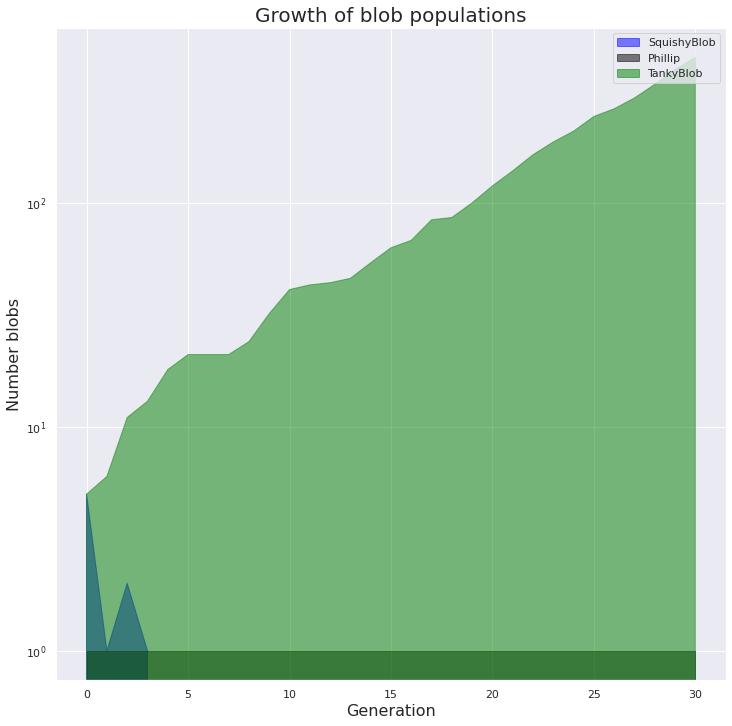

In [15]:
e.plot_growth()

Looks like our prediction was correct! The additional survival benefit conferred to the `TankyBlob`s enabled them to out-survive and grow past what the weaker `SquishyBlob`s were able to.  Our sanity check, `Phillip`, lets us have some level of confidence in the simulation as well, since he was built to only survive indefinitely and never reproduce which is what we see here

We can watch the blobs interact in this sandbox environment here as well. Notice how quicky the `SquishyBlob`s die out and the `TankyBlob`s take over

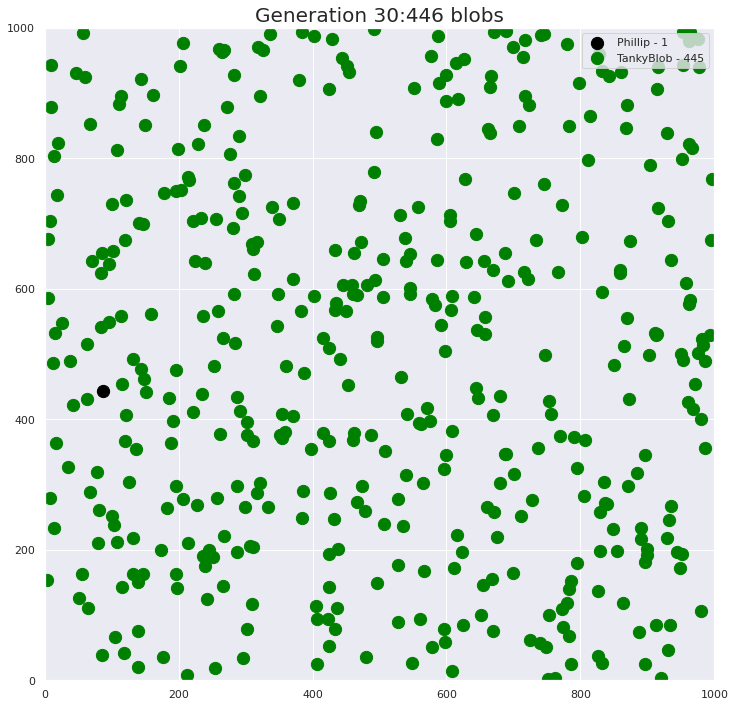

In [16]:
e.show_all_generations()

With just one change in attributes, we were able to demonstrate an emergent property of natural selection. This is just the tip of the iceberg for what `pyevo` is capable of. In theory, any simulation of natural selection conditions should be definable and simulatable under this framework. The only limitations are your imagination and computational power!